#**Dataset Overview**

In [1]:
#import required libraries
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#read the csv file
data<-read.csv('CU_Boulder_Applicant_Data.csv')
head(data)

,Admit.Status,Admit_Term,Admitted_UCB,BACH.Inst.City,BACH.Inst.IPEDS,BACH.Inst.Name,BACH.Inst.State,BACH_Inst_Country,BACH_Loc,BACH_PubPrv,⋯,Count_BACH_Intl,Enrolled,GMAT.Total,GRE2011.Quant,GRE2011.Verbal,Latitude,Longitude,LSAT.Score,Number.of.Students,Sum.Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,"Applied, not Admitted",Summer/Fall,Not Admitted,University Park,214777,Pennsylvania State University-Main Campus,Pennsylvania,,Domestic,Public,⋯,0,0,NA,161,161,40.80073,-77.86164,NA,1,1
2,"Applied, not Admitted",Summer/Fall,Not Admitted,College Park,163286,University of Maryland-College Park,Maryland,,Domestic,Public,⋯,0,0,NA,162,161,38.98861,-76.93970,NA,1,1
3,"Applied, not Admitted",Summer/Fall,Not Admitted,Northridge,110608,California State University-Northridge,California,,Domestic,Public,⋯,0,0,NA,146,162,34.23671,-118.52682,NA,1,1
4,"Applied, not Admitted",Summer/Fall,Not Admitted,Emporia,155025,Emporia State University,Kansas,,Domestic,Public,⋯,0,0,NA,159,163,38.41258,-96.17945,NA,1,1
5,"Applied, not Admitted",Summer/Fall,Not Admitted,Greeley,127741,University of Northern Colorado,Colorado,,Domestic,Public,⋯,0,0,NA,149,164,40.40318,-104.70172,NA,1,1
6,"Applied, not Admitted",Summer/Fall,Not Admitted,Los Angeles,110662,University of California-Los Angeles,California,,Domestic,Public,⋯,0,0,NA,150,164,34.06889,-118.44390,NA,1,1


In [3]:
#display the column names
colnames(data)

[1] "Admit.Status"       "Admit_Term"         "Admitted_UCB"      
 [4] "BACH.Inst.City"     "BACH.Inst.IPEDS"    "BACH.Inst.Name"    
 [7] "BACH.Inst.State"    "BACH_Inst_Country"  "BACH_Loc"          
[10] "BACH_PubPrv"        "College.School"     "Deg"               
[13] "Encrypted.ID"       "Enrolled_UCB"       "Fall_Data"         
[16] "Gender"             "Hover_ACO"          "Level"             
[19] "Major"              "Masters_Type"       "MaxYear"           
[22] "Minority.Status"    "MinYear"            "Race.Ethnicity"    
[25] "Reset.Filters"      "Residency"          "Subplan"           
[28] "Term.Cd"            "Year"               "Year_Discrete"     
[31] "X..Admitted"        "X..Enrolled"        "Admitted"          
[34] "Applied"            "Bach.Gpa"           "Count.BACH.Inst"   
[37] "Count.GMAT"         "Count.Gpa"          "Count.gre2011"     
[40] "Count.LSAT"         "Count_BACH_Intl"    "Enrolled"          
[43] "GMAT.Total"         "GRE2011.Quant"      "GRE2011.Verbal"    
[46] "Latitude"           "Longitude"          "LSAT.Score"        
[49] "Number.of.Students" "Sum.Total"


# **Data Preprocessing**:

##Select the required columns for analysis

In [4]:
#select the required columns
data_pre_process<-subset(data, select = c('Encrypted.ID','Admit.Status','Level','Major','Residency','Year_Discrete','Admitted','Applied','Enrolled','Count.GMAT','Count.gre2011'))
head(data_pre_process)

,Encrypted.ID,Admit.Status,Level,Major,Residency,Year_Discrete,Admitted,Applied,Enrolled,Count.GMAT,Count.gre2011
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,E951197375,"Applied, not Admitted",Doctoral,CHEM - Chemistry,Non-Resident,2014,0,1,0,0,1
2,E200418375,"Applied, not Admitted",Doctoral,EBIO - Ecology & Evolutionary Biology,Non-Resident,2014,0,1,0,0,1
3,E136557375,"Applied, not Admitted",Doctoral,ENGL - English,Non-Resident,2014,0,1,0,0,1
4,E288857375,"Applied, not Admitted",Doctoral,BCHM - Biochemistry,Non-Resident,2014,0,1,0,0,1
5,E538857375,"Applied, not Admitted",Doctoral,HIST - History,Non-Resident,2014,0,1,0,0,1
6,E941058375,"Applied, not Admitted",Doctoral,PSYC - Psychology,Non-Resident,2014,0,1,0,0,1


In [5]:
#count the number of rows
nrow(data_pre_process)

[1] 182991

##Check for null values

In [6]:
#checking null values
num_na_values <- colSums(is.na(data_pre_process))
num_na_values

Encrypted.ID  Admit.Status         Level         Major     Residency 
            0             0             0             0             0 
Year_Discrete      Admitted       Applied      Enrolled    Count.GMAT 
            0             0             0             0             0 
Count.gre2011 
            0

##Rename the column names to lower case for better readability

In [7]:
#rename column names
data_pre_process <- data_pre_process %>%
  rename(
    user_id = Encrypted.ID,
    admit.status = Admit.Status,
    level = Level,
    major = Major,
    residency = Residency,
    year_discrete = Year_Discrete,
    admitted = Admitted,
    applied = Applied,
    enrolled = Enrolled,
    count.gmat = Count.GMAT,
    count.gre2011 = Count.gre2011
  )

head(data_pre_process)


,user_id,admit.status,level,major,residency,year_discrete,admitted,applied,enrolled,count.gmat,count.gre2011
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,E951197375,"Applied, not Admitted",Doctoral,CHEM - Chemistry,Non-Resident,2014,0,1,0,0,1
2,E200418375,"Applied, not Admitted",Doctoral,EBIO - Ecology & Evolutionary Biology,Non-Resident,2014,0,1,0,0,1
3,E136557375,"Applied, not Admitted",Doctoral,ENGL - English,Non-Resident,2014,0,1,0,0,1
4,E288857375,"Applied, not Admitted",Doctoral,BCHM - Biochemistry,Non-Resident,2014,0,1,0,0,1
5,E538857375,"Applied, not Admitted",Doctoral,HIST - History,Non-Resident,2014,0,1,0,0,1
6,E941058375,"Applied, not Admitted",Doctoral,PSYC - Psychology,Non-Resident,2014,0,1,0,0,1


##Check for datatypes

In [8]:
#check datatypes
str(data_pre_process)

'data.frame':	182991 obs. of  11 variables:
 $ user_id      : chr  "E951197375" "E200418375" "E136557375" "E288857375" ...
 $ admit.status : chr  "Applied, not Admitted" "Applied, not Admitted" "Applied, not Admitted" "Applied, not Admitted" ...
 $ level        : chr  "Doctoral" "Doctoral" "Doctoral" "Doctoral" ...
 $ major        : chr  "CHEM - Chemistry" "EBIO - Ecology & Evolutionary Biology" "ENGL - English" "BCHM - Biochemistry" ...
 $ residency    : chr  "Non-Resident" "Non-Resident" "Non-Resident" "Non-Resident" ...
 $ year_discrete: int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ admitted     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ applied      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ enrolled     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ count.gmat   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ count.gre2011: int  1 1 1 1 1 1 1 1 1 1 ...


##Check for duplicates values

In [9]:
# Check for duplicate rows
duplicate_rows <- data_pre_process[duplicated(data_pre_process), ]

# Print the duplicate rows
print(duplicate_rows)

          user_id           admit.status    level                         major
11761  E253063775  Applied, not Admitted  Masters EEEN - Electrical Engineering
12515  E210307975  Applied, not Admitted  Masters EEEN - Electrical Engineering
12778  E921008015 Admitted, not Enrolled  Masters EEEN - Electrical Engineering
15983  E707701875 Admitted, not Enrolled  Masters       CSEN - Computer Science
22889  E972583775 Admitted, not Enrolled  Masters EEEN - Electrical Engineering
23044  E615594775    Admitted & Enrolled Doctoral      CVEN - Civil Engineering
28255  E258727015 Admitted, not Enrolled  Masters EEEN - Electrical Engineering
50963  E785664575  Applied, not Admitted  Masters       CSEN - Computer Science
81211  E629217375  Applied, not Admitted  Masters EEEN - Electrical Engineering
95519  E409442575  Applied, not Admitted  Masters EEEN - Electrical Engineering
111181 E901006775  Applied, not Admitted  Masters       CSEN - Computer Science
111369 E132555475  Applied, not Admitted

In [10]:
#remove duplicates
cleaned_data <- unique(data_pre_process)
head(cleaned_data)

,user_id,admit.status,level,major,residency,year_discrete,admitted,applied,enrolled,count.gmat,count.gre2011
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,E951197375,"Applied, not Admitted",Doctoral,CHEM - Chemistry,Non-Resident,2014,0,1,0,0,1
2,E200418375,"Applied, not Admitted",Doctoral,EBIO - Ecology & Evolutionary Biology,Non-Resident,2014,0,1,0,0,1
3,E136557375,"Applied, not Admitted",Doctoral,ENGL - English,Non-Resident,2014,0,1,0,0,1
4,E288857375,"Applied, not Admitted",Doctoral,BCHM - Biochemistry,Non-Resident,2014,0,1,0,0,1
5,E538857375,"Applied, not Admitted",Doctoral,HIST - History,Non-Resident,2014,0,1,0,0,1
6,E941058375,"Applied, not Admitted",Doctoral,PSYC - Psychology,Non-Resident,2014,0,1,0,0,1


In [11]:
#count the number of rows of cleaned data set
nrow(cleaned_data)

[1] 182979

In [12]:
#number of duplicates removed
nrow(data_pre_process)-nrow(cleaned_data)

[1] 12

##As per our analysis, we will be focusing only on master's graduate students.

In [13]:
#filter the data by level 'Masters'
filtered_data<-cleaned_data %>% filter(level=='Masters')
head(filtered_data)

,user_id,admit.status,level,major,residency,year_discrete,admitted,applied,enrolled,count.gmat,count.gre2011
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,E050419175,"Applied, not Admitted",Masters,GEOG - Geography,Non-Resident,2012,0,1,0,0,1
2,E417389175,"Applied, not Admitted",Masters,COMM - Communication,Non-Resident,2012,0,1,0,0,1
3,E232601975,"Applied, not Admitted",Masters,ANTH - Anthropology,Non-Resident,2012,0,1,0,0,1
4,E409232175,"Applied, not Admitted",Masters,EBIO - Ecology & Evolutionary Biology,Non-Resident,2012,0,1,0,0,1
5,E646911975,"Applied, not Admitted",Masters,GEOG - Geography,Non-Resident,2012,0,1,0,0,1
6,E562941975,"Applied, not Admitted",Masters,PSPP - Political Sci-Publ Policy,Non-Resident,2012,0,1,0,0,1


In [14]:
#count the number of rows
nrow(filtered_data)

[1] 84221

#**Exploratory Data Analysis**


##Trend of applicants over time

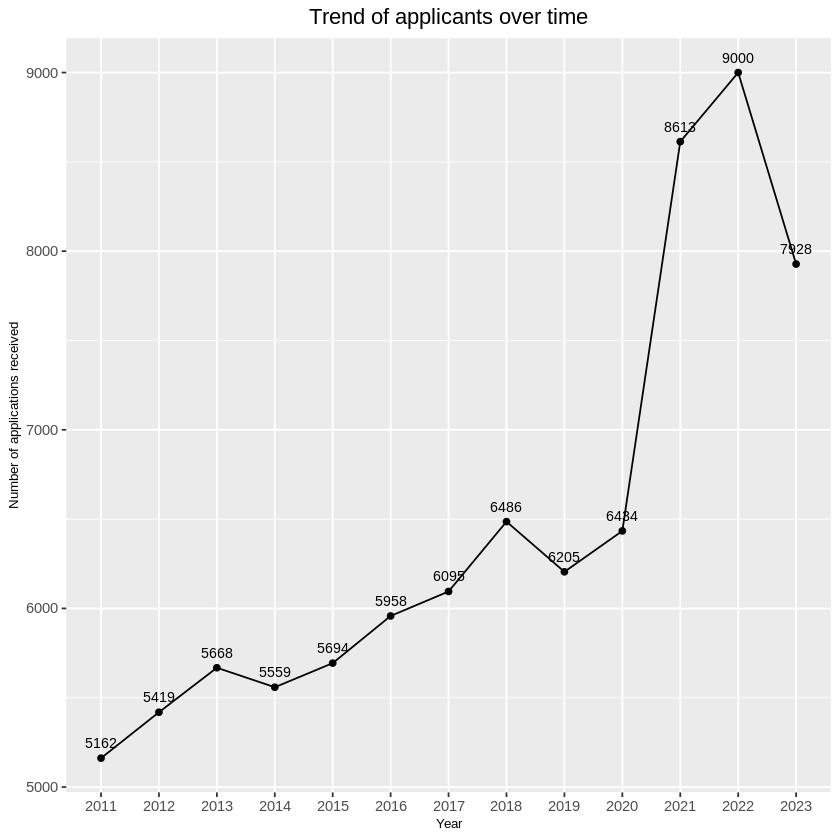

In [15]:
# Number of applicants received since 2011.
app_recvd <- filtered_data %>%
    select(year_discrete, applied) %>%
      group_by(year_discrete) %>%
        summarise(applications_received= sum(applied))

app_recvd$year_discrete <- as.factor(app_recvd$year_discrete)

ggplot(data = app_recvd) +
  geom_line(mapping = aes(x= year_discrete, y= applications_received, group= 1)) +
    geom_point(mapping = aes(x= year_discrete, y= applications_received)) +
       geom_text(mapping = aes(x = year_discrete, y = applications_received, label = applications_received),vjust = -1, hjust = 0.5, size = 3) +
          labs(x= "Year", y= "Number of applications received", title= "Trend of applicants over time") +
            scale_x_discrete(breaks = unique(app_recvd$year_discrete)) + #To display all years in x axis labels
              theme(plot.title = element_text(hjust = 0.5), axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8))



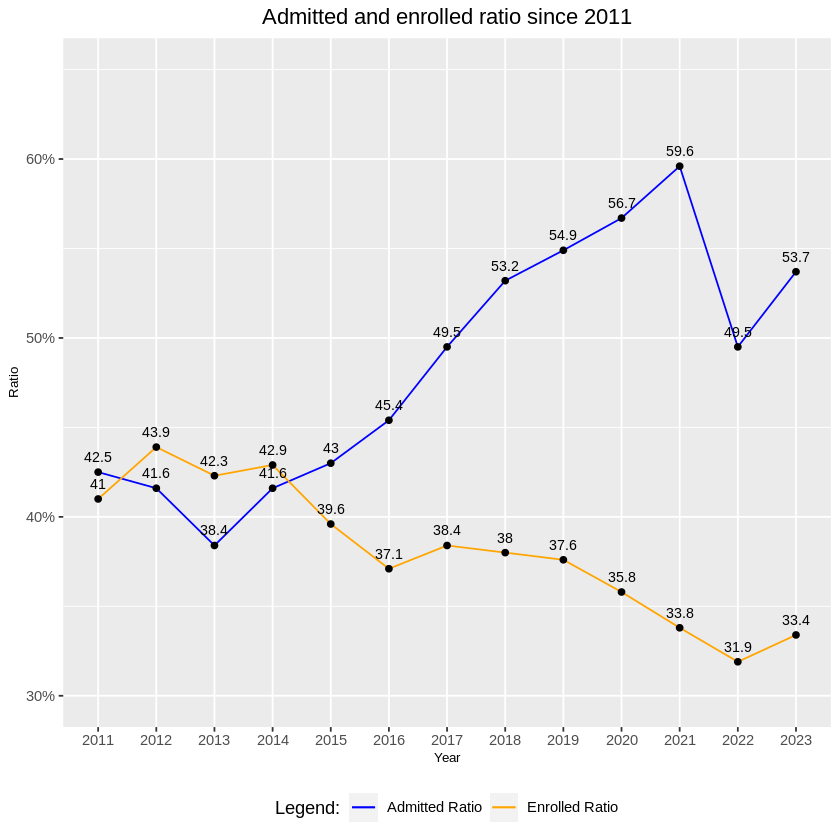

In [16]:
# Admitted and enrolled ratio since 2011.
admit_enroll_ratio <- filtered_data %>%
    select(year_discrete, applied, admitted, enrolled) %>%
      group_by(year_discrete) %>%
        summarise(applied= sum(applied), admitted=sum(admitted), enrolled= sum(enrolled)) %>%
          mutate(admitted_ratio=round(100*(admitted/applied),1), enrolled_ratio= round(100*(enrolled/admitted),1)) %>%
            select(year_discrete, admitted_ratio, enrolled_ratio)

admit_enroll_ratio$year_discrete <- as.factor(admit_enroll_ratio$year_discrete)

ggplot(data = admit_enroll_ratio) +
  geom_line(mapping = aes(x= year_discrete, y= admitted_ratio, group =1, color= 'Admitted Ratio')) +
  geom_line(mapping = aes(x= year_discrete, y= enrolled_ratio, group =1, color= 'Enrolled Ratio' )) +
    geom_point(mapping = aes(x= year_discrete, y= admitted_ratio)) +
    geom_point(mapping = aes(x= year_discrete, y= enrolled_ratio)) +
      geom_text(mapping = aes(x = year_discrete, y = admitted_ratio, label = admitted_ratio),vjust = -1, hjust = 0.5, size = 3) +
      geom_text(mapping = aes(x = year_discrete, y = enrolled_ratio, label = enrolled_ratio),vjust = -1, hjust = 0.5, size = 3) +
        labs(x= "Year", y= "Ratio", title= "Admitted and enrolled ratio since 2011") +
        scale_color_manual(values = c('Admitted Ratio'= 'blue', 'Enrolled Ratio'= 'orange'), name = 'Legend:') +
        scale_y_continuous(labels = scales::percent_format(scale = 1)) +
          theme(plot.title = element_text(hjust = 0.5), axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8), legend.position = "bottom") +
            expand_limits(y = c(30, 65))

##Course popularity at CU

**Top 5 majors that received application (CSEN, DTSC, BUAN, ASEN, SLHS, EEEN) trend over time for last 10 years.**

`summarise()` has grouped output by 'year_discrete'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'year_discrete'. You can override using the
`.groups` argument.


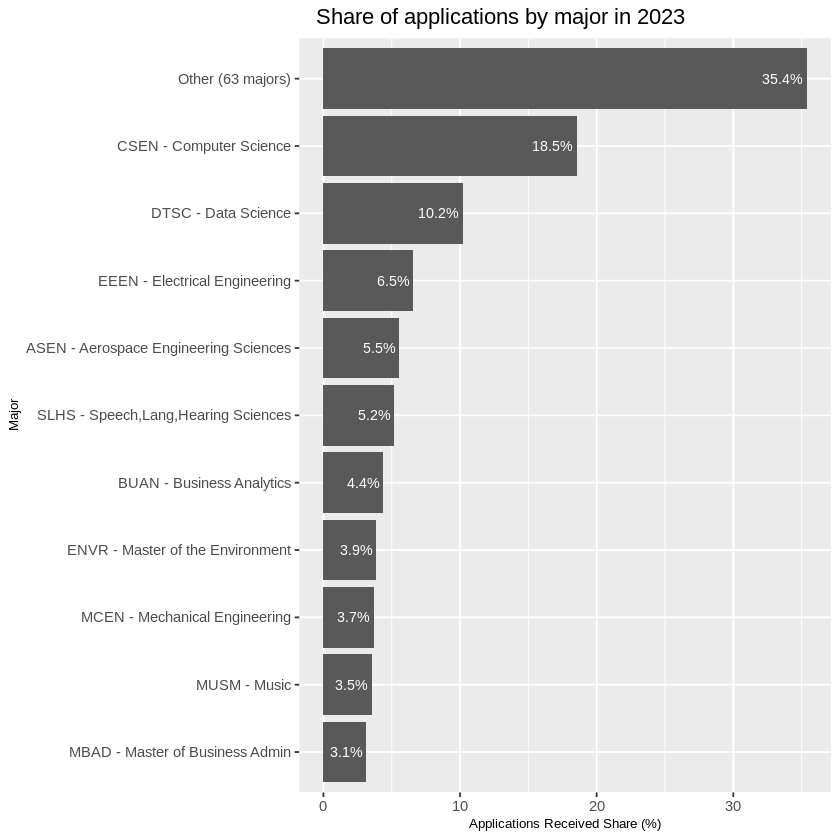

In [17]:
# Top majors that received applications in the year 2023
top_major <- filtered_data %>%
  filter(year_discrete == 2023) %>%
    select(year_discrete, major, applied) %>%
      group_by(year_discrete, major) %>%
        summarise(applications_received = sum(applied)) %>%
          arrange(desc(applications_received)) %>%
            mutate(major_bucketed = ifelse(row_number() <= 10, as.character(major), "Other (63 majors)")) %>%
              select(year_discrete, major_bucketed,applications_received) %>%
                group_by(year_discrete, major_bucketed) %>%
                  summarise(applications_received = sum(applications_received))

total_applications <- sum(top_major$applications_received)

top_major <- top_major %>%
  mutate(applications_received_share=round(100*(applications_received/total_applications),2)) %>%
    select(year_discrete, major_bucketed,applications_received_share) %>%
      arrange(desc(applications_received_share))

ggplot(data = top_major) +
  geom_col(mapping=aes(x = reorder(major_bucketed, applications_received_share),y = applications_received_share))+
      geom_text(aes(x = major_bucketed, y = applications_received_share, label = sprintf("%.1f%%", applications_received_share)),hjust = +1.1, vjust = 0.5, size = 3, color = "white") +
          labs(x = "Major", y = "Applications Received Share (%)",title = "Share of applications by major in 2023") +
            coord_flip() +
              theme(plot.title = element_text(hjust = 0.1), axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8), legend.position = "bottom")

##Influence of standardized scores on admission status

`summarise()` has grouped output by 'year_discrete'. You can override using the
`.groups` argument.


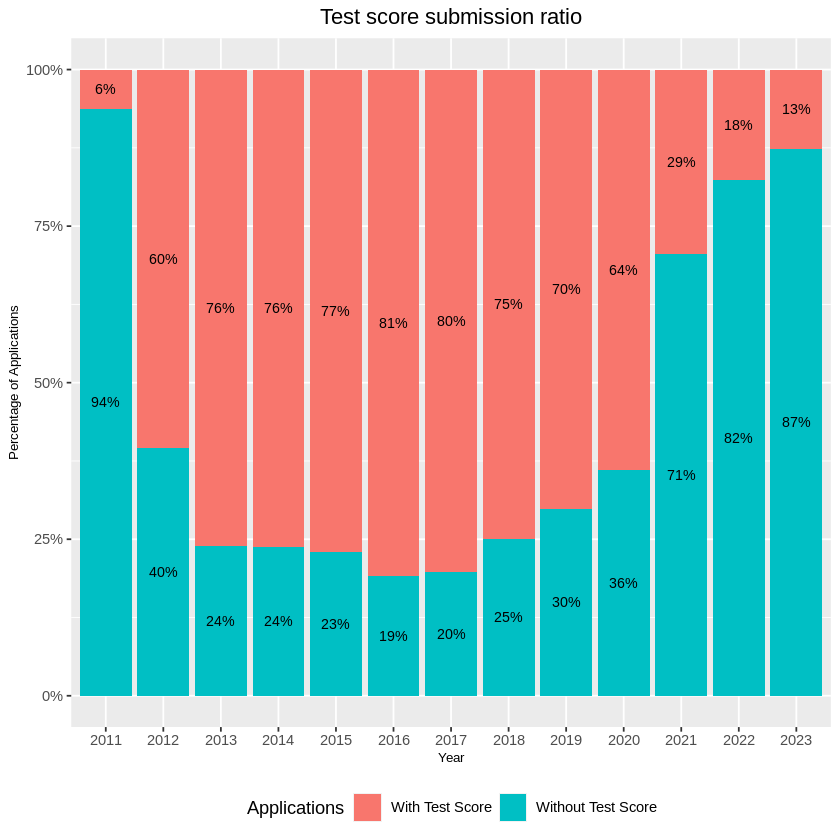

In [18]:
# Ratio of applications split by test scores
test_scores_data= filtered_data %>%
  mutate(test_score_submission_flag= ifelse((count.gmat==1 | count.gre2011==1) , 1, 0)) %>%
      select(year_discrete, test_score_submission_flag, applied) %>%
        group_by(year_discrete, test_score_submission_flag) %>%
          summarise(applications_received = sum(applied)) %>%
            mutate(test_score_submission_flag = ifelse(test_score_submission_flag==1, "With Test Score", "Without Test Score")) %>%
                mutate(percentage = round(applications_received / sum(applications_received),2))


test_scores_data$year_discrete <- as.factor(test_scores_data$year_discrete)


ggplot(test_scores_data, aes(x = year_discrete, y =applications_received , fill =factor(test_score_submission_flag))) +
  geom_bar(stat = "identity", position = "fill") +
    scale_y_continuous(labels = scales::percent_format(scale = 100)) +
      labs(title = "Test score submission ratio",x= "Year", y = "Percentage of Applications",fill = "Applications") +
       geom_text(aes(label = scales::percent(percentage)),   position = position_fill(vjust = 0.5), size = 3,  color = "black")  +
          theme(plot.title = element_text(hjust = 0.5), axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8), legend.position = "bottom") +
            scale_x_discrete(breaks = unique(test_scores_data$year_discrete))

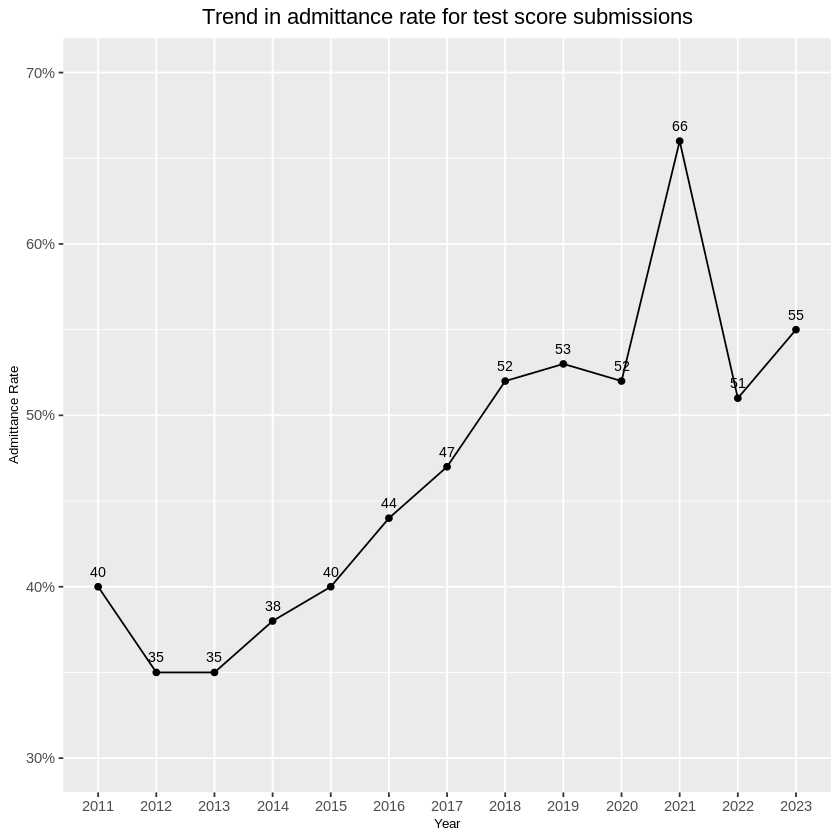

In [19]:
# Ratio of test score submitted applications got admitted
admitted_ratio_ts= filtered_data %>%
  mutate(test_score_submission_flag= ifelse((count.gmat==1 | count.gre2011==1) , 1, 0)) %>%
    filter(test_score_submission_flag==1) %>%
      select(year_discrete, applied, admitted) %>%
        group_by(year_discrete) %>%
          summarise(applied = sum(applied), admitted= sum(admitted)) %>%
                mutate(admitted_ratio = round(100*(admitted / applied))) %>%
                  select(year_discrete, admitted_ratio)

admitted_ratio_ts$year_discrete <- as.factor(admitted_ratio_ts$year_discrete)

ggplot(data = admitted_ratio_ts) +
  geom_line(mapping = aes(x= year_discrete, y= admitted_ratio, group= 1)) +
    geom_point(mapping = aes(x= year_discrete, y= admitted_ratio)) +
       geom_text(mapping = aes(x = year_discrete, y = admitted_ratio, label = admitted_ratio),vjust = -1, hjust = 0.5, size = 3) +
          labs(x= "Year", y= "Admittance Rate", title= "Trend in admittance rate for test score submissions") +
            scale_x_discrete(breaks = unique(app_recvd$year_discrete)) + #To display all years in x axis labels
              theme(plot.title = element_text(hjust = 0.5), axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8)) +
                scale_y_continuous(labels = scales::percent_format(scale = 1), limits = c(30,70))

Warning message:
“Use of `admitted_ratio_ts$period` is discouraged.
ℹ Use `period` instead.”
Warning message:
“Use of `admitted_ratio_ts$period` is discouraged.
ℹ Use `period` instead.”


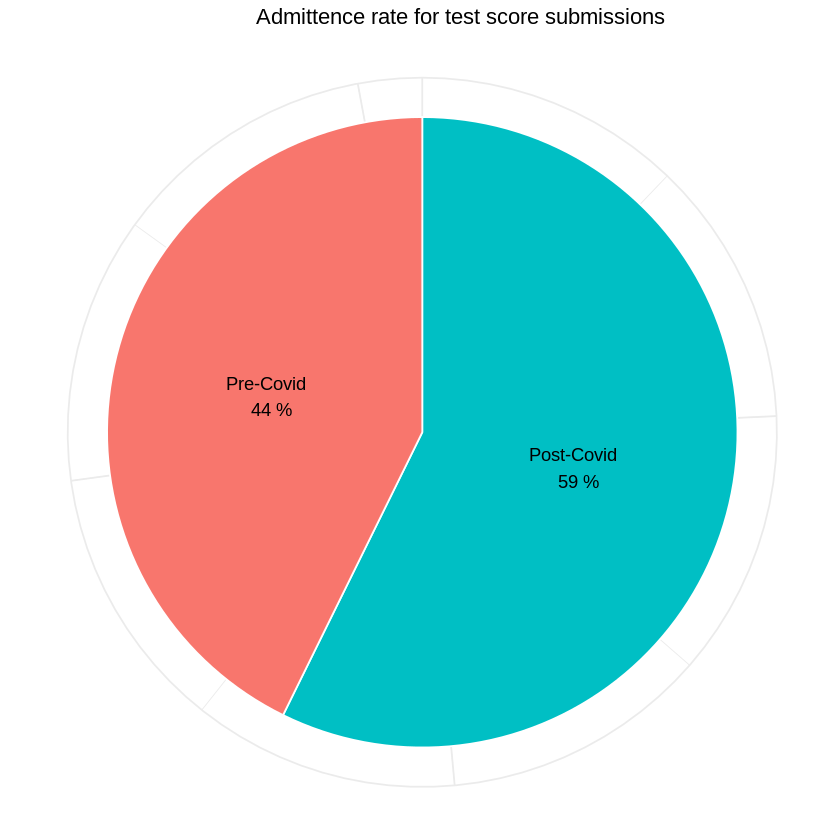

In [20]:
# Ratio of test score submitted applications got admitted
admitted_ratio_ts= filtered_data %>%
  mutate(test_score_submission_flag= ifelse((count.gmat==1 | count.gre2011==1) , 1, 0)) %>%
    filter(test_score_submission_flag==1) %>%
      mutate(period= ifelse(year_discrete <= 2020, 'Pre-Covid', "Post-Covid")) %>%
      select(period, applied, admitted) %>%
        group_by(period) %>%
          summarise(applied = sum(applied), admitted= sum(admitted)) %>%
                mutate(admitted_ratio = round(100*(admitted / applied))) %>%
                  select(period, admitted_ratio)


# Create a pie chart with ggplot2
ggplot(admitted_ratio_ts, aes(x = "", y = admitted_ratio, fill = rainbow(length(admitted_ratio_ts$period)))) +
  geom_bar(stat = "identity", width = 1, color = "white") +
    coord_polar("y") +
      labs(title = "Admittence rate for test score submissions", fill = "period") +
        theme_minimal() +
          theme(legend.position = "none", axis.text = element_blank(), axis.title = element_blank(), plot.title = element_text(hjust = 0.6))+
            geom_text(aes(label = paste(period, "\n", admitted_ratio, "%")), position = position_stack(vjust = 0.5))

#**Hypothesis test**  


##Analysis 1:  
**The proportion of residents getting admitted is more than non-residents for master's degree in the U.S.**

$H_O: P1 <= P2$

$H_A: P1 > P2$

$P1: \text{Ratio of admitted (admitted/applied) resident applicants}$

$P2: \text{Ratio of admitted (admitted/applied) non-resident applicants}$

**Resident students**

In [21]:
#number of resident students applied
resident_applicants<-filtered_data %>% filter(residency=='Resident')
no_res_app<-nrow(resident_applicants)
no_res_app

[1] 13016

In [22]:
#unique row names in admit status column
unique(filtered_data$admit.status)

[1] "Applied, not Admitted"  "Admitted, not Enrolled" "Admitted & Enrolled"

In [23]:
#number of resident applicants admitted
admit_res_app<-resident_applicants %>% filter(admit.status %in% c('Admitted, not Enrolled','Admitted & Enrolled'))
no_res_app_admit<-nrow(admit_res_app)
no_res_app_admit

[1] 9776

**Non-Resident students**

In [24]:
#number of non resident students applied
non_resident_applicants<-filtered_data %>% filter(residency=='Non-Resident')
no_non_res_app<-nrow(non_resident_applicants)
no_non_res_app

[1] 69823

In [25]:
#number of non resident applicants admitted
admit_non_res_app<-non_resident_applicants %>% filter(admit.status %in% c('Admitted, not Enrolled','Admitted & Enrolled'))
no_non_res_app_admit<-nrow(admit_non_res_app)
no_non_res_app_admit

[1] 31436

Sample size:

$n_1= 13,016$

$n_2= 69,823$

The sample sizes are huge enough to assume the sample proportions follow a normal distribution (Central Limit Theorem).

In the current sample:

$\hat{p_1} = 0.75$

$\hat{p_2} = 0.45$

Shows that P1 is greater than P2, but is it significantly higher?

In [26]:
#perform prop test
result<-prop.test(c(no_res_app_admit,no_non_res_app_admit),c(no_res_app,no_non_res_app),correct = FALSE, alternative = "greater")
print(result)


	2-sample test for equality of proportions without continuity correction

data:  c(no_res_app_admit, no_non_res_app_admit) out of c(no_res_app, no_non_res_app)
X-squared = 3972.1, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
95 percent confidence interval:
 0.2938906 1.0000000
sample estimates:
   prop 1    prop 2 
0.7510756 0.4502241 



The above result states that the difference in proportions have a confidence interval [0.29 to 1] (or let's say greater than 0.29 as the max difference of ratios can only be 1) which means that
1. Resident's admit proportion is mostly atleast 0.29 greater than non-resident's admit proportion.  
2. And getting a differnce as 0 or lesser is a very rare occurance (less than 5% of the time).

So we can reject the null hypothesis and conclude that the ratio of residents getting admit is significantly higher.

##Analysis 2:    
**GRE/GMAT scores have an influence on application conversion even after COVID.**

$H_O: P1 >= P2$

$H_A: P1 < P2$

$P1: \text{Admit percentage pre-covid of test score submitted application}$

$P2: \text{Admit percentage post-covid of test score submitted application}$

In [27]:
#filtered out the admitted master's students who have submitted GRE and GMAT scores
filter_admit_app<-filtered_data %>% filter(count.gre2011 == '1'| count.gmat =='1')
head(filter_admit_app)

,user_id,admit.status,level,major,residency,year_discrete,admitted,applied,enrolled,count.gmat,count.gre2011
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,E050419175,"Applied, not Admitted",Masters,GEOG - Geography,Non-Resident,2012,0,1,0,0,1
2,E417389175,"Applied, not Admitted",Masters,COMM - Communication,Non-Resident,2012,0,1,0,0,1
3,E232601975,"Applied, not Admitted",Masters,ANTH - Anthropology,Non-Resident,2012,0,1,0,0,1
4,E409232175,"Applied, not Admitted",Masters,EBIO - Ecology & Evolutionary Biology,Non-Resident,2012,0,1,0,0,1
5,E646911975,"Applied, not Admitted",Masters,GEOG - Geography,Non-Resident,2012,0,1,0,0,1
6,E562941975,"Applied, not Admitted",Masters,PSPP - Political Sci-Publ Policy,Non-Resident,2012,0,1,0,0,1


In [28]:
#filtered out the pre covid data
data_pre_covid<-filter_admit_app %>% filter(year_discrete<2020) %>% select('admitted','applied')
cat("Sample Size:", nrow(data_pre_covid),'\n')
num=sum(data_pre_covid$admitted)
den=sum(data_pre_covid$applied)
cat("Admitted applicants pre covid:",num,'\n')
cat("Applied applicants pre covid:",den,'\n')
cat("Proportion ratio:",num/den,'\n')

Sample Size: 35453 
Admitted applicants pre covid: 15430 
Applied applicants pre covid: 35453 
Proportion ratio: 0.4352241 


In [29]:
#filtered out the post covid data
data_post_covid<-filter_admit_app %>% filter(year_discrete>2020) %>% select('admitted','applied')
cat("Sample Size:", nrow(data_post_covid),'\n')
num= sum(data_post_covid$admitted)
den=sum(data_post_covid$applied)
cat("Admitted applicants post covid:",num,'\n')
cat("Applied applicants post covid:",den,'\n')
cat("Proportion ratio:",num/den,'\n')


Sample Size: 5126 
Admitted applicants post covid: 3044 
Applied applicants post covid: 5126 
Proportion ratio: 0.5938353 


Sample size:

$n_1= 35,453$

$n_2= 5,126$

The sample sizes are huge enough to assume the sample proportions follow a normal distribution (Central Limit Theorem).

In the current sample:

$\hat{p_1} = 0.44$

$\hat{p_2} = 0.59$

Shows that P2 is greater than P1, but is it significantly higher?

In [30]:
result_1<-prop.test(c(sum(data_pre_covid$admitted),sum(data_post_covid$admitted)),c(sum(data_pre_covid$applied),sum(data_post_covid$applied)),correct = FALSE, alternative = "less")
print(result_1)


	2-sample test for equality of proportions without continuity correction

data:  c(sum(data_pre_covid$admitted), sum(data_post_covid$admitted)) out of c(sum(data_pre_covid$applied), sum(data_post_covid$applied))
X-squared = 454.31, df = 1, p-value < 2.2e-16
alternative hypothesis: less
95 percent confidence interval:
 -1.0000000 -0.1465256
sample estimates:
   prop 1    prop 2 
0.4352241 0.5938353 



The above result states that the difference in proportions have a confidence interval [-1 to -0.14] (or let's say lesser than -0.14 as the max difference of ratios can only be -1) which means that
1. Proportion of applicants submitted test score getting admitted pre-covid is mostly atleast 0.14 lesser than post-covid admit proportion.  
2. And getting a difference as 0 or greater is a very rare occurance (less than 5% of the time).

So we can reject the null hypothesis and conclude that ratio applicants submitting the test scores getting admitted is more post-covid than pre-covid.Hence, GRE/GMAT scores have an influence on application conversion even after COVID.